# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/datasnaek/league-of-legends/data

**Task:**

League of Legends 게임의 다양한 측면에서 수집한 데이터를 Logistic회귀를 사용하여 어떤 팀이(블루팀과 레드팀 중) 게임에서 이길지 예측하기

**Datasets**

* Train dataset: 전체 데이터의 70%(test_size=0.3)

* Validation dataset: 전체 데이터 중 Train 데이터를 제외한 나머지 15%가 Validation 데이터로 사용

* Test dataset: 전체 데이터 중 Validation 데이터를 제외한 나머지 15%가 Test 데이터로 사용

**Features(x):**

csv파일에는 여러 변수가 있지만, 그 중 LoL의 승패에 가장 많은 영향을 끼치는 towerKills를 features로 정했습니다.

**Target(y):**

게임에서 승리하는 팀 winner를 target으로 정했습니다.

---

## Build Your Model

### Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
## Load the dataset
data = pd.read_csv('games.csv')

In [3]:
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


<Axes: >

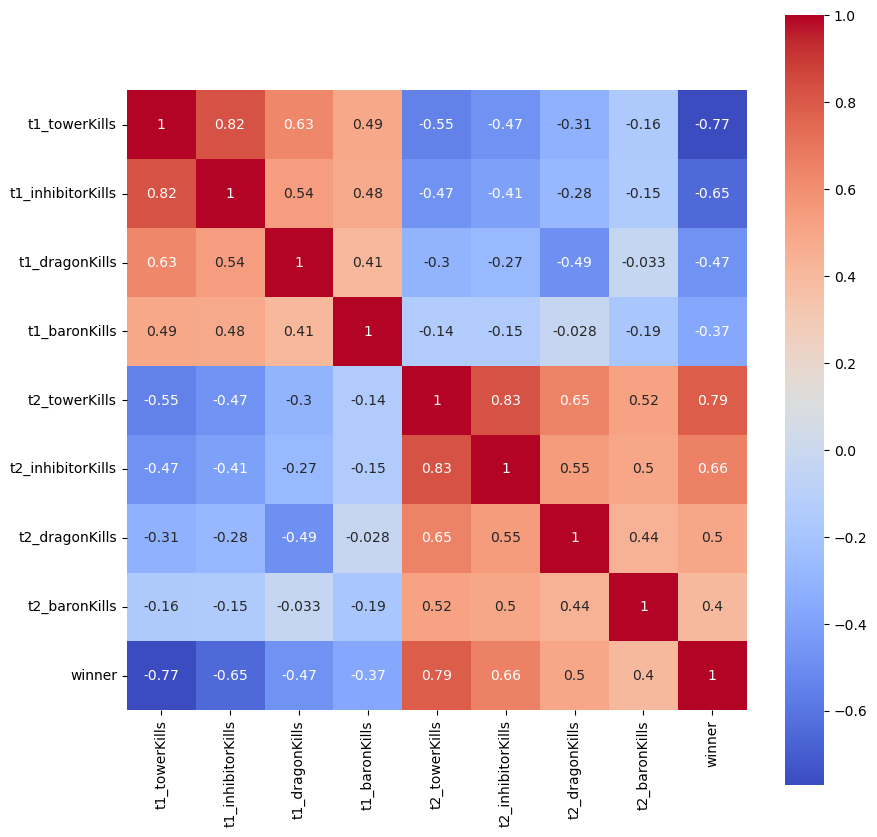

In [4]:
## 어느 data가 우승에 영향을 많이 끼치는지 확인

fig = plt.figure(figsize=(10,10))
sns.heatmap(data[['t1_towerKills','t1_inhibitorKills','t1_dragonKills','t1_baronKills',
                  't2_towerKills','t2_inhibitorKills','t2_dragonKills','t2_baronKills','winner']].corr(),annot=True,square=True,cmap='coolwarm')

In [5]:
## select feaatures and target
## towerKills가 가장 영향을 많이 준다고 생각해서 target으로 towerKills선정

X = data[['t1_towerKills', 't2_towerKills']]
Y = data['winner']

## data를 train data와 test data로 나누고, test data 안에서 다시 validation data와 test data로 나눔
## test data와 validation data로 나누기 전의 test data를 임시저장 하기 위해 temp 사용

x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=101)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=101)

### Model Construction

In [6]:
## 분석 모델 구성

logmodel = LogisticRegression()

### Train Model & Select Model

In [7]:
logmodel.fit(x_train, y_train)

LogisticRegression()

---

## Performance

In [8]:
## Validation 데이터 검증

predictions_validation = logmodel.predict(x_validation)
print("Validation Data Evaluation : ")
print(classification_report(y_validation, predictions_validation))

Validation Data Evaluation : 
              precision    recall  f1-score   support

           1       0.95      0.96      0.96      3877
           2       0.96      0.95      0.96      3846

    accuracy                           0.96      7723
   macro avg       0.96      0.96      0.96      7723
weighted avg       0.96      0.96      0.96      7723



In [9]:
## Test 데이터로 평가

predictions_test = logmodel.predict(x_test)
print("Test Data Evaluation : ")
print(classification_report(y_test, predictions_test))

Test Data Ecaluation : 
              precision    recall  f1-score   support

           1       0.95      0.96      0.96      3856
           2       0.96      0.95      0.96      3868

    accuracy                           0.96      7724
   macro avg       0.96      0.96      0.96      7724
weighted avg       0.96      0.96      0.96      7724



The results explains

precision은 팀 1과 2의 승패에 대한 정밀도로, 각 클래스에 대한 예측 중 얼마나 많은 것이 실제로 해당 클래스에 속하는지를 나타냅니다.
recall은 실제로 해당 클래스에 속하는 것 중 얼마나 많은 것을 모델이 정확하게 예측했는지를 나타냅니다.
f1-score는 정밀도와 재현율의 조화 평균으로, 모델의 성능을 종합적으로 나타내는 지표입니다.
accuracy는 모든 클래스에 대한 정확한 예측의 비율을 나타냅니다.
support는 각 클래스의 실제 데이터 포인트 수를 나타냅니다.

이 결과를 해석할 때, 모델이 정확도와 f1점수가 높아 데이터를 잘 분류하고 있다는것을 의미합니다.